# EDA Brasileirão 2024

In this exploratory data analysis (EDA), we aim to uncover insights from the *Campeonato Brasileiro Série A* dataset — Brazil’s top-tier football league. Our objective is to analyze various aspects of match attendance, team performance (both at home and away), and crowd size on match outcomes.

By examining patterns in the data, we seek to answer the following key questions:

- Which teams scored the most goals at home?
- Which teams conceded the most goals at home?
- Which teams scored the most goals as visitor?
- Which teams conceded the most goals as visitor?
- Which team won the most matches at home?
- Which team lost the most matches at home?
- Which team drew the most matches at home?
- Which team won the most matches as a visitor?
- Which team lost the most matches as a visitor?
- Which team drew the most matches as a visitor?
- Which team had the highest total attendance across all matches?
- Which team had the most matches with attendance above the overall average?
- Which stadium had the highest attendance in a single match?
- How long did you get the most points away from home?
- How long did you get the most points at home?

Through this EDA, we hope to identify trends and relationships that help explain the influence of home-field advantage, fan attendance, and team consistency throughout the season.

Dataset: https://www.kaggle.com/datasets/fabioschirmann/brasileiro-2024-srie-a-dataset/versions/1/data

In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('brasileirao.csv')

In [4]:
dataset.head()

,Data,Horário,Em casa,Resultado,Visitante,Público,Local
0,2024-04-13,18:30,Criciúma,1–1,Juventude,12.804,Estádio Heriberto Hülse
1,2024-04-13,18:30,Internacional,2–1,Bahia,19.103,Estádio José Pinheiro Borba
2,2024-04-14,16:00,Ath Paranaense,4–0,Cuiabá,21.388,Ligga Arena
3,2024-04-14,16:00,Vasco da Gama,2–1,Grêmio,17.722,Estádio Club de Regatas Vasco da Gama
4,2024-04-14,16:00,Corinthians,0–0,Atlético Mineiro,44.285,Neo Química Arena


In [5]:
dataset.tail()

,Data,Horário,Em casa,Resultado,Visitante,Público,Local
323,2024-11-09,19:00,Fortaleza,3–0,Vasco da Gama,NaN,Estádio Castelão
324,2024-11-09,19:00,Atl Goianiense,0–0,Red Bull Bragantino,NaN,Estádio Antônio Accioly
325,2024-11-09,19:00,Juventude,2–1,Bahia,NaN,Estádio Alfredo Jaconi
326,2024-11-08,21:30,Palmeiras,1–0,Grêmio,NaN,Allianz Parque
327,2024-11-09,21:00,São Paulo,2–1,Ath Paranaense,NaN,Estádio do Morumbi


In [6]:
dataset.describe()

,Público
count,141.000000
mean,24.056638
std,15.162558
min,1.208000
25%,12.108000
50%,21.037000
75%,35.836000
max,62.228000


#### First, we will perform some preprocessing on the data in which we will
#### split the "Resultado" (Result) column into four new columns: goals scored, goals conceded, goal difference, and final result (whether the team won, lost, or drew).  
#### The idea is to have numerical values for the number of goals scored and conceded, as well as the goal difference per match.


In [7]:
df = pd.read_csv('brasileirao.csv')
# Extracting goals scored and conceded
df[["Gols Feitos", "Gols Sofridos"]] = df["Resultado"].str.extract(r"(\d+)–(\d+)").astype(int)

# Calculating goal difference
df["Saldo de Gols"] = df["Gols Feitos"] - df["Gols Sofridos"]

# Classify the results
def classificar_resultado(gf, gs):
    if gf > gs:
        return "Ganhou"
    elif gf < gs:
        return "Perdeu"
    else:
        return "Empatou"

df["Resultado Final"] = df.apply(lambda row: classificar_resultado(row["Gols Feitos"], row["Gols Sofridos"]), axis=1)

# Function to assign points based on the final result
def assign_points(resultado):
    if resultado == 'Empatou':
        return 1, 1  # At home points, Visitor pontos
    elif resultado == 'Ganhou':
        return 3, 0  
    else:  # loser
        return 0, 3  

df[['Em casa pontos', 'Visitante pontos']] = df['Resultado Final'].apply(assign_points).tolist()

# Salve a new dataset
file_path = "brasileirao_2024_tratado.csv"
df.to_csv(file_path, index=False)

In [8]:
df = pd.read_csv('brasileirao_2024_tratado.csv')


In [9]:
df.head()

,Data,Horário,Em casa,Resultado,Visitante,Público,Local,Gols Feitos,Gols Sofridos,Saldo de Gols,Resultado Final,Em casa pontos,Visitante pontos
0,2024-04-13,18:30,Criciúma,1–1,Juventude,12.804,Estádio Heriberto Hülse,1,1,0,Empatou,1,1
1,2024-04-13,18:30,Internacional,2–1,Bahia,19.103,Estádio José Pinheiro Borba,2,1,1,Ganhou,3,0
2,2024-04-14,16:00,Ath Paranaense,4–0,Cuiabá,21.388,Ligga Arena,4,0,4,Ganhou,3,0
3,2024-04-14,16:00,Vasco da Gama,2–1,Grêmio,17.722,Estádio Club de Regatas Vasco da Gama,2,1,1,Ganhou,3,0
4,2024-04-14,16:00,Corinthians,0–0,Atlético Mineiro,44.285,Neo Química Arena,0,0,0,Empatou,1,1


In [10]:
df.describe()

,Público,Gols Feitos,Gols Sofridos,Saldo de Gols,Em casa pontos,Visitante pontos
count,141.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,24.056638,1.417683,1.006098,0.411585,1.746951,0.996951
std,15.162558,1.080516,0.986124,1.511865,1.296899,1.220364
min,1.208000,0.000000,0.000000,-5.000000,0.000000,0.000000
25%,12.108000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,21.037000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,35.836000,2.000000,2.000000,1.000000,3.000000,1.000000
max,62.228000,5.000000,6.000000,5.000000,3.000000,3.000000


In [11]:
df.isnull().sum()

Data                  0
Horário               0
Em casa               0
Resultado             0
Visitante             0
Público             187
Local                 0
Gols Feitos           0
Gols Sofridos         0
Saldo de Gols         0
Resultado Final       0
Em casa pontos        0
Visitante pontos      0
dtype: int64

#### Lets pre processing null values put the median

In [12]:
df['Público'] = df['Público'].fillna(24.056638)


In [13]:
df.isnull().sum()

Data                0
Horário             0
Em casa             0
Resultado           0
Visitante           0
Público             0
Local               0
Gols Feitos         0
Gols Sofridos       0
Saldo de Gols       0
Resultado Final     0
Em casa pontos      0
Visitante pontos    0
dtype: int64

In [14]:
df.describe()

,Público,Gols Feitos,Gols Sofridos,Saldo de Gols,Em casa pontos,Visitante pontos
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,24.056638,1.417683,1.006098,0.411585,1.746951,0.996951
std,9.921164,1.080516,0.986124,1.511865,1.296899,1.220364
min,1.208000,0.000000,0.000000,-5.000000,0.000000,0.000000
25%,24.056638,1.000000,0.000000,0.000000,1.000000,0.000000
50%,24.056638,1.000000,1.000000,0.000000,1.000000,1.000000
75%,24.056638,2.000000,2.000000,1.000000,3.000000,1.000000
max,62.228000,5.000000,6.000000,5.000000,3.000000,3.000000


#### Lets visualization the summary of values using boxplot

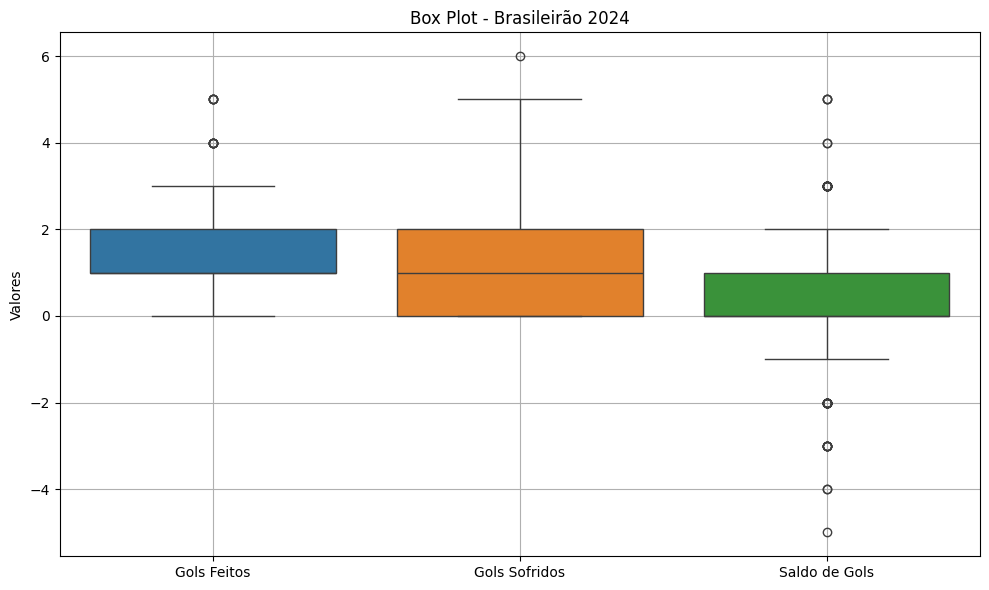

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select coluns to boxplot
cols_boxplot = ["Gols Feitos", "Gols Sofridos", "Saldo de Gols"]
df_boxplot = df[cols_boxplot]

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_boxplot)
plt.title("Box Plot - Brasileirão 2024")
plt.ylabel("Valores")
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
df['Público'].dtype

dtype('float64')

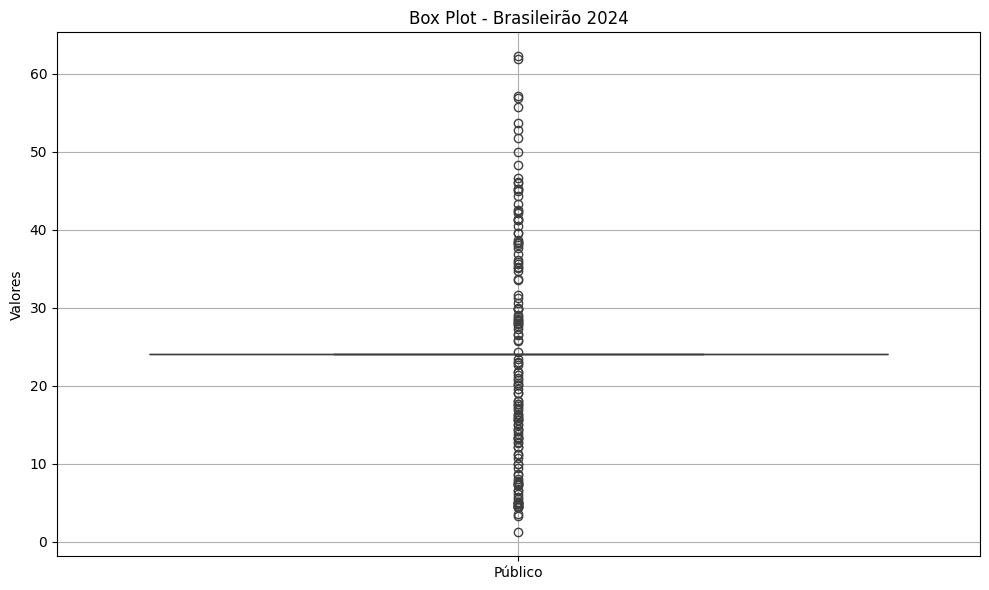

In [17]:
# Select a columns Publico to a single box plot
cols_boxplot = ["Público"]
df_boxplot = df[cols_boxplot]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_boxplot)
plt.title("Box Plot - Brasileirão 2024")
plt.ylabel("Valores")
plt.grid(True)
plt.tight_layout()
plt.show()

#### To answer this question:
Which teams scored the most goals at home?

#### We use a bar visualization and like we see Palmeira is the team with most gols score
#### followed by Corinthians and Fortaleza

/var/folders/94/5k1_ghp56xx72w4v2ly5kr1w0000gp/T/ipykernel_80443/3886150187.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gols_feitos.index, y=gols_feitos.values, palette="Blues")


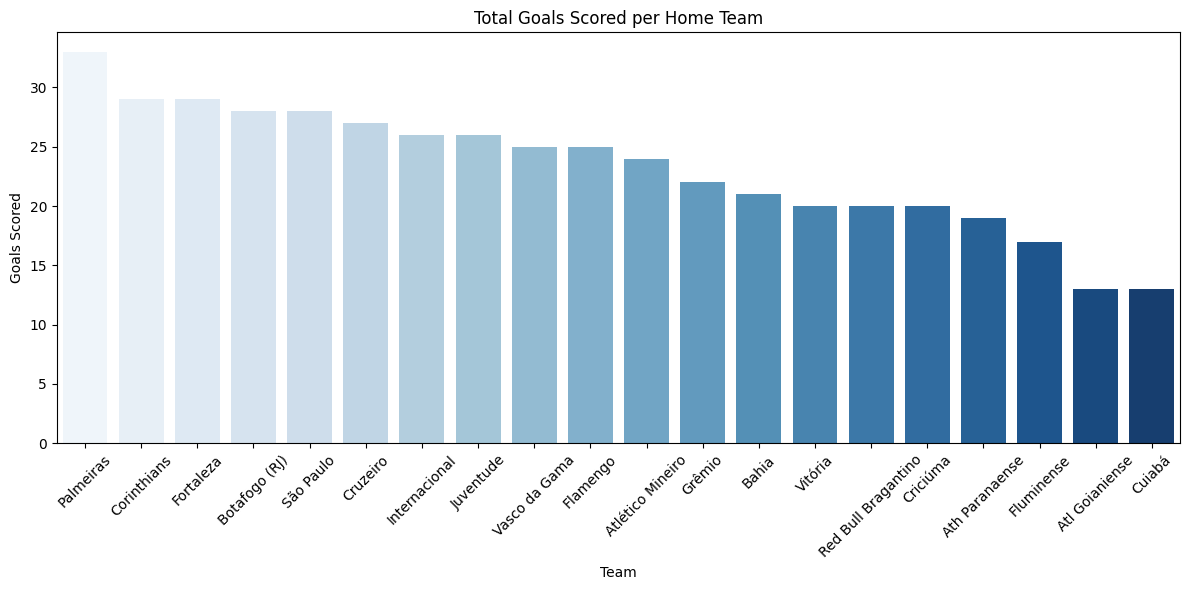

In [19]:
gols_feitos = df.groupby('Em casa')['Gols Feitos'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=gols_feitos.index, y=gols_feitos.values, palette="Blues")
plt.title("Total Goals Scored per Home Team")
plt.ylabel("Goals Scored")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### To answer this question:
Which teams scored the most goals as visitor?

#### We use a bar visualization and like we see Bahia is the team with most gols score
#### followed by Juventude and Criciúma

/var/folders/94/5k1_ghp56xx72w4v2ly5kr1w0000gp/T/ipykernel_80443/3409473874.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gols_feitos.index, y=gols_feitos.values, palette="Blues")


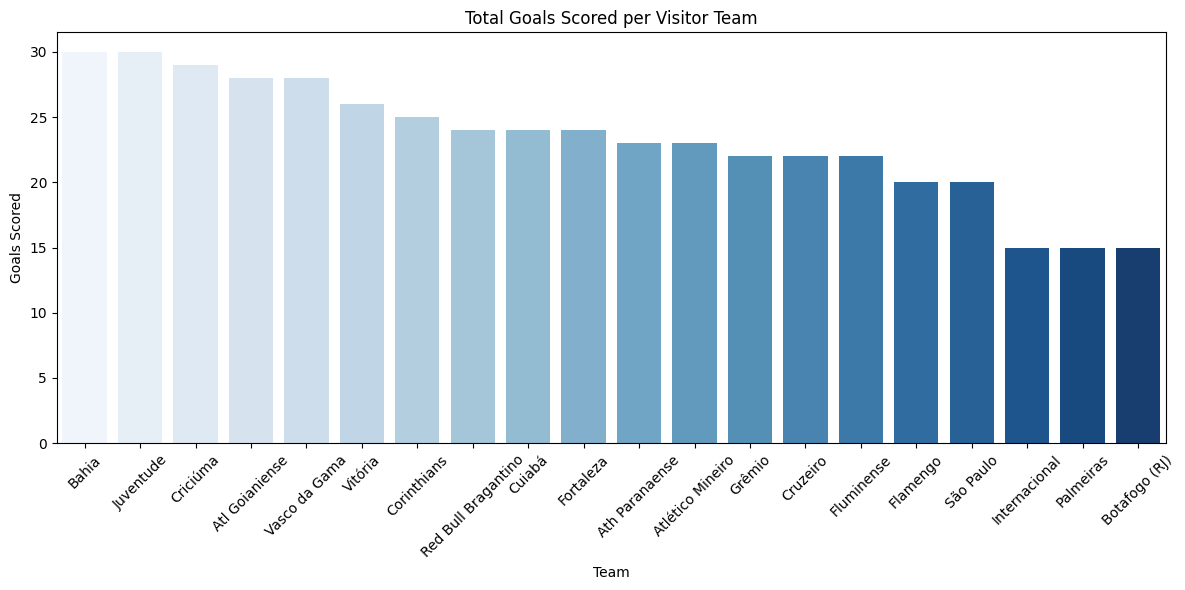

In [20]:
gols_feitos = df.groupby('Visitante')['Gols Feitos'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=gols_feitos.index, y=gols_feitos.values, palette="Blues")
plt.title("Total Goals Scored per Visitor Team")
plt.ylabel("Goals Scored")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### To answer this question:
Which teams conceded the most goals at home?

#### We use a bar visualization and like we see Atletico minieiro is the team with most gols concerded
#### followed by Vitória and Atletico goianiense

/var/folders/94/5k1_ghp56xx72w4v2ly5kr1w0000gp/T/ipykernel_80443/1721157810.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gols_sofridos.index, y=gols_sofridos.values, palette="Reds")


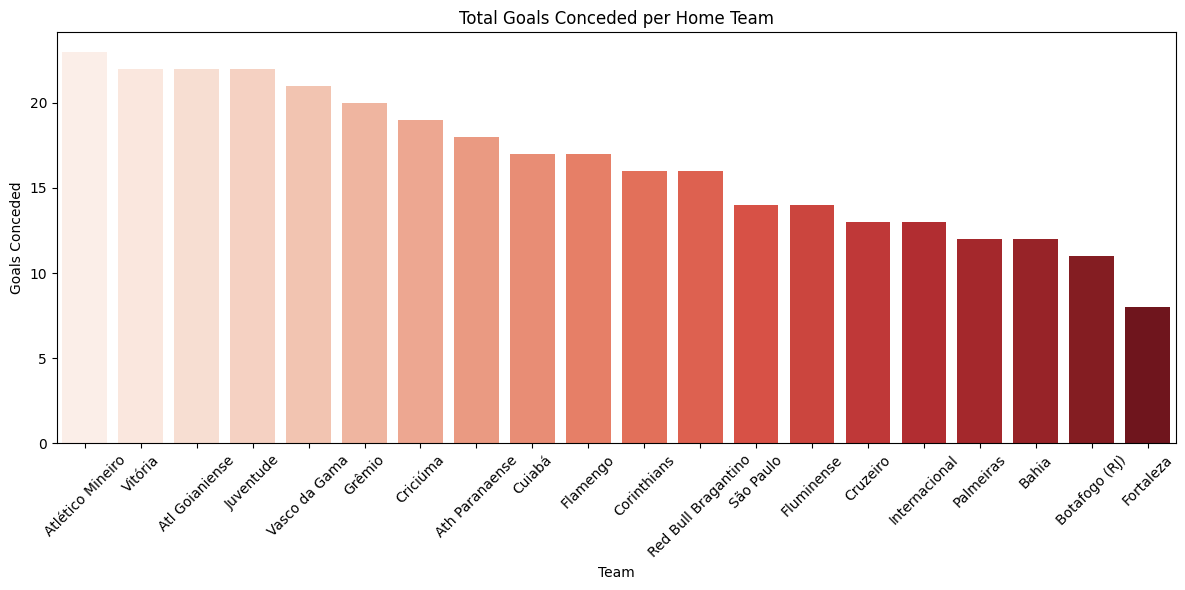

In [21]:
gols_sofridos = df.groupby('Em casa')['Gols Sofridos'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=gols_sofridos.index, y=gols_sofridos.values, palette="Reds")
plt.title("Total Goals Conceded per Home Team")
plt.ylabel("Goals Conceded")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### To answer this question:
Which teams conceded the most goals as visitor?

#### We use a bar visualization and like we see Flamengo is the team with most gols concerded
#### followed by Botafogo and Bahia

/var/folders/94/5k1_ghp56xx72w4v2ly5kr1w0000gp/T/ipykernel_80443/1934943691.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gols_sofridos.index, y=gols_sofridos.values, palette="Reds")


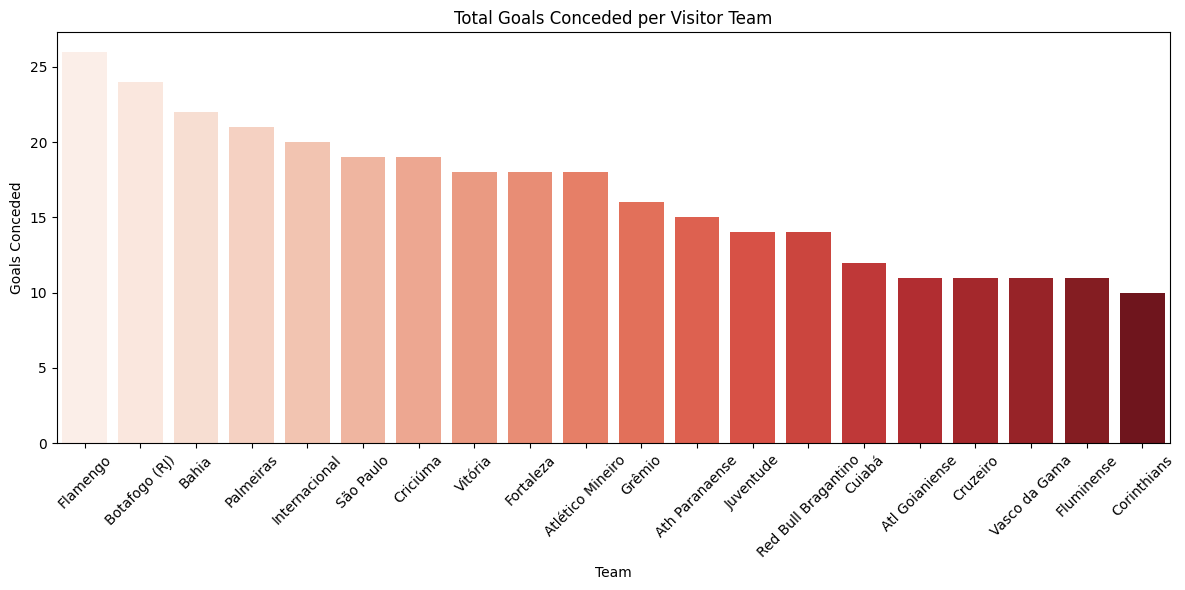

In [22]:
gols_sofridos = df.groupby('Visitante')['Gols Sofridos'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=gols_sofridos.index, y=gols_sofridos.values, palette="Reds")
plt.title("Total Goals Conceded per Visitor Team")
plt.ylabel("Goals Conceded")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### To answer this questions:
Which team won the most matches at home?
Which team lost the most matches at home?
Which team drew the most matches at home?

### We use a bar visualization and like we see Fortaleza is the team with most won at home 
### and Vitoria team was the most lost and Corithians the most drew

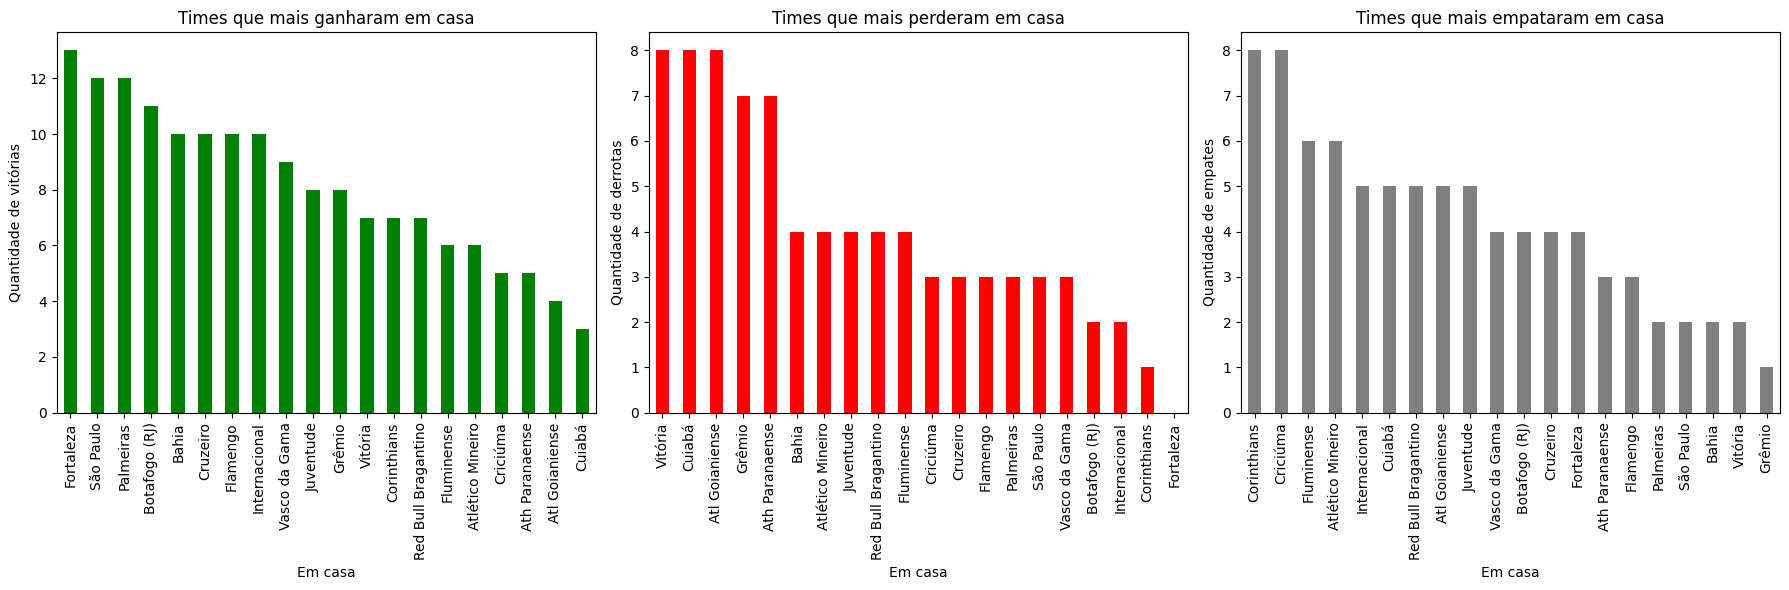

In [23]:
# Group by to at home and end result
resultados_por_time = df.groupby(["Em casa", "Resultado Final"]).size().unstack(fill_value=0)

# Show 3 visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

resultados_por_time["Ganhou"].sort_values(ascending=False).plot(kind="bar", ax=axes[0], color="green")
axes[0].set_title("Times que mais ganharam em casa")
axes[0].set_ylabel("Quantidade de vitórias")

resultados_por_time["Perdeu"].sort_values(ascending=False).plot(kind="bar", ax=axes[1], color="red")
axes[1].set_title("Times que mais perderam em casa")
axes[1].set_ylabel("Quantidade de derrotas")

resultados_por_time["Empatou"].sort_values(ascending=False).plot(kind="bar", ax=axes[2], color="gray")
axes[2].set_title("Times que mais empataram em casa")
axes[2].set_ylabel("Quantidade de empates")

plt.tight_layout()
plt.show()

### To answer this questions:
Which team won the most matches as a visitor?
Which team lost the most matches as a visitor?
Which team drew the most matches as a visitor?

### We use a bar visualization and like we see Fluminense is the team with most won as a visitor 
### and Botafogo team was the most lost at visitor and Red Bull bragantino the most drew

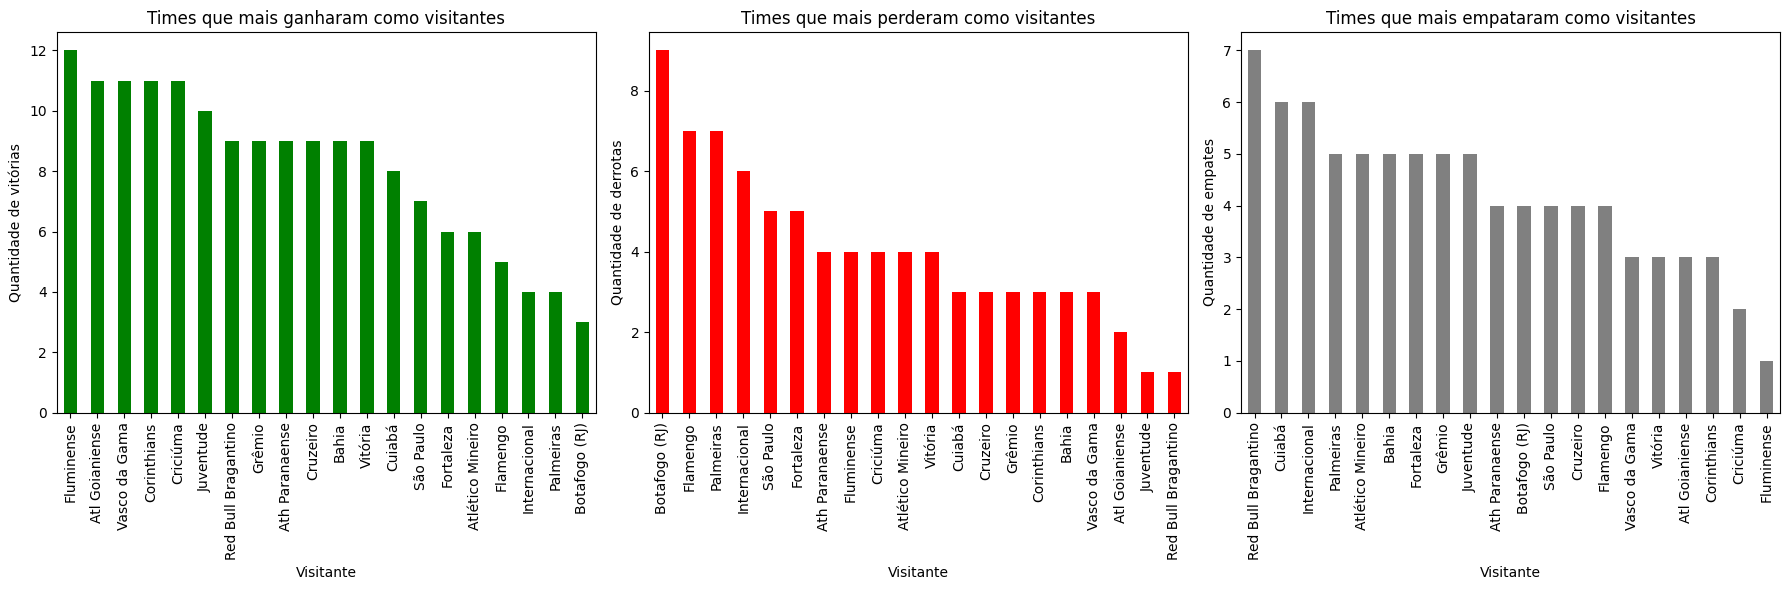

In [38]:
# # Group by to at visitor and end result
resultados_por_time = df.groupby(["Visitante", "Resultado Final"]).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

resultados_por_time["Ganhou"].sort_values(ascending=False).plot(kind="bar", ax=axes[0], color="green")
axes[0].set_title("Times que mais ganharam como visitantes")
axes[0].set_ylabel("Quantidade de vitórias")

resultados_por_time["Perdeu"].sort_values(ascending=False).plot(kind="bar", ax=axes[1], color="red")
axes[1].set_title("Times que mais perderam como visitantes")
axes[1].set_ylabel("Quantidade de derrotas")

resultados_por_time["Empatou"].sort_values(ascending=False).plot(kind="bar", ax=axes[2], color="gray")
axes[2].set_title("Times que mais empataram como visitantes")
axes[2].set_ylabel("Quantidade de empates")

plt.tight_layout()
plt.show()

#### When we observe the audience by stadium, we identify that the Jornalista Mário Filho Stadium, known as Maracanã, had the highest attendance, followed by the Neo Química Arena, Corinthians' stadium. It is worth noting that the Maracanã hosts games for Flamengo, Fluminense, and Vasco, among others, due to security restrictions in case of Vasco, which naturally makes it the stadium with the most games as both home and away. However, this does not diminish its role in attracting a larger number of spectators. link: https://www.cnnbrasil.com.br/esportes/futebol/entenda-acordo-entre-dupla-fla-flu-e-vasco-para-utilizacao-do-maracana/

/var/folders/94/5k1_ghp56xx72w4v2ly5kr1w0000gp/T/ipykernel_80443/2450634795.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publico_por_estadio.values, y=publico_por_estadio.index, palette="magma")


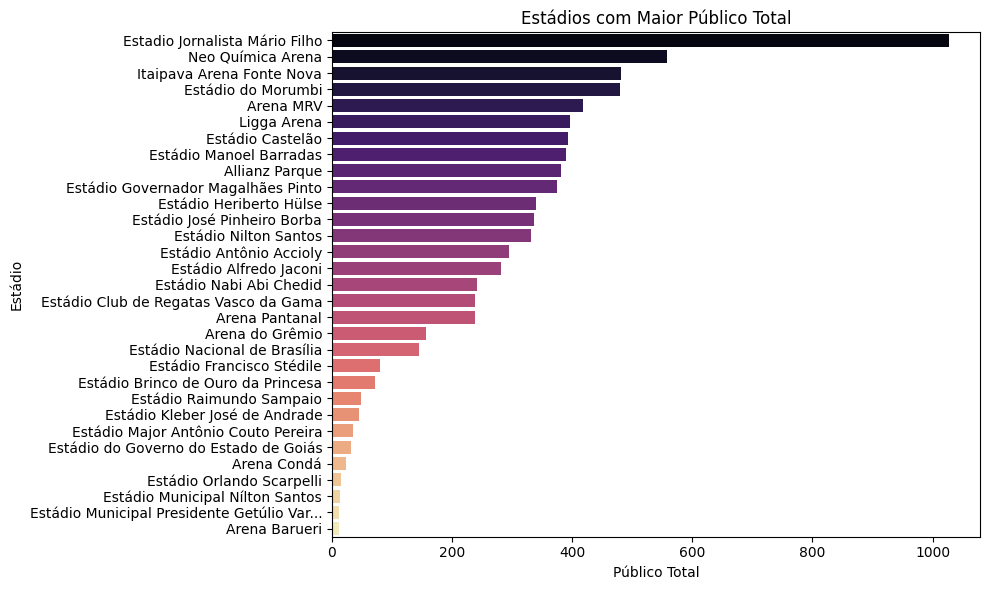

In [40]:
df2 = df.dropna(subset=["Público"])

publico_por_estadio = df2.groupby("Local")["Público"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=publico_por_estadio.values, y=publico_por_estadio.index, palette="magma")
plt.title("Estádios com Maior Público Total")
plt.xlabel("Público Total")
plt.ylabel("Estádio")
plt.tight_layout()
plt.show()

#### As observed in the chart above, the Maracanã was the stadium with the highest attendance, but since the stadium is shared with other teams, if we break it down by team, Flamengo comes in first, followed by Corinthians, and then Fluminense, appearing on the list, corroborating our analysis of dividing the stadium. When we look at the number of games in which each team had above-average attendance, we identify Corinthians in first place, followed by São Paulo.

/var/folders/94/5k1_ghp56xx72w4v2ly5kr1w0000gp/T/ipykernel_80443/4020805236.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publico_total.values, y=publico_total.index, palette="Blues_d")
/var/folders/94/5k1_ghp56xx72w4v2ly5kr1w0000gp/T/ipykernel_80443/4020805236.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acima_media_count.values, y=acima_media_count.index, palette="Greens_d")


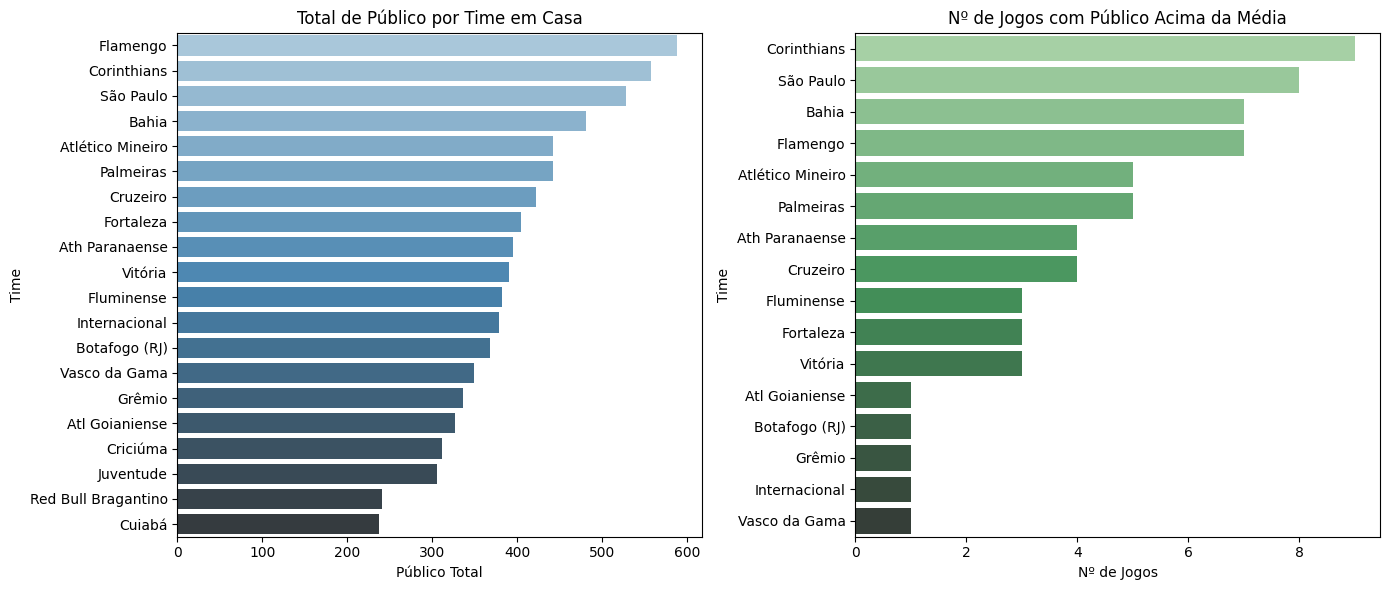

In [43]:
publico_total = df.groupby("Em casa")["Público"].sum().sort_values(ascending=False)

media_publico = df["Público"].mean()
df["Acima da média"] = df["Público"] > media_publico
acima_media_count = df[df["Acima da média"]].groupby("Em casa").size().sort_values(ascending=False)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=publico_total.values, y=publico_total.index, palette="Blues_d")
plt.title("Total de Público por Time em Casa")
plt.xlabel("Público Total")
plt.ylabel("Time")

plt.subplot(1, 2, 2)
sns.barplot(x=acima_media_count.values, y=acima_media_count.index, palette="Greens_d")
plt.title("Nº de Jogos com Público Acima da Média")
plt.xlabel("Nº de Jogos")
plt.ylabel("Time")

plt.tight_layout()
plt.show()

#### To answer this question:
- How long did you get the most points away from home?
- How long did you get the most points at home?

#### We use a bar visualization and like we see Fortaleza is the team with most points at home and Botafogo is the team with most points away from home.


Team with most points at home: Fortaleza (43 pontos)
Team with most points away home: Botafogo (RJ) (31 pontos)


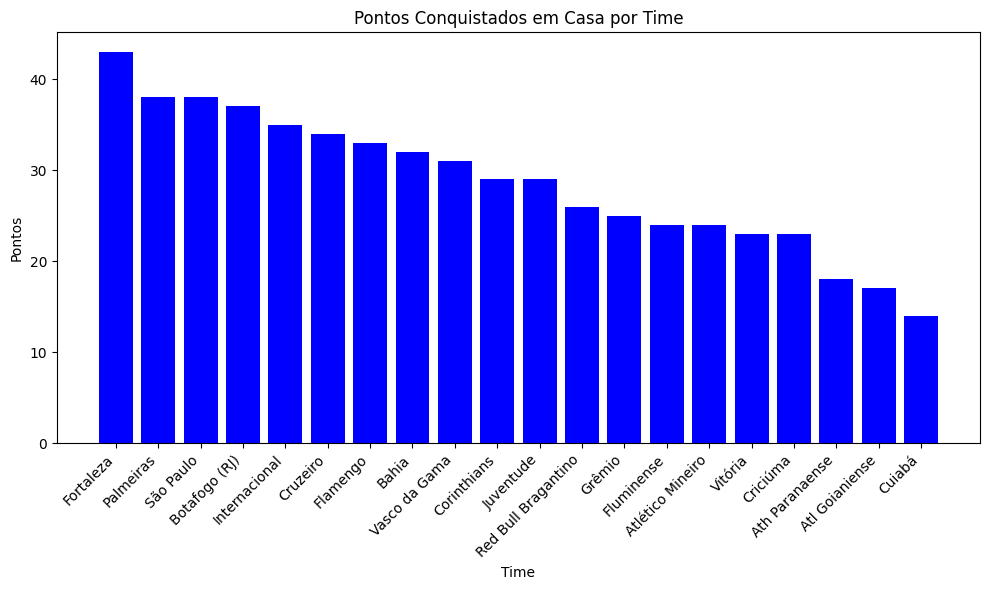

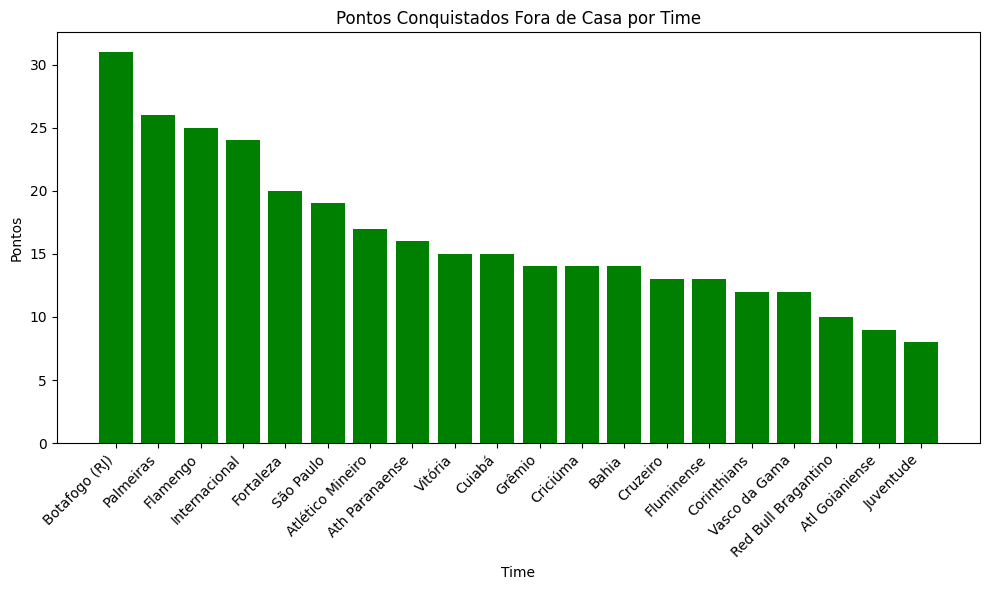

In [35]:
home_points = df.groupby('Em casa')['Em casa pontos'].sum().reset_index()
home_points.columns = ['Time', 'Pontos']
home_points = home_points.sort_values(by='Pontos', ascending=False) 

away_points = df.groupby('Visitante')['Visitante pontos'].sum().reset_index()
away_points.columns = ['Time', 'Pontos']
away_points = away_points.sort_values(by='Pontos', ascending=False)

max_home_team = home_points.iloc[0]
print(f"Team with most points at home: {max_home_team['Time']} ({max_home_team['Pontos']} pontos)")

max_away_team = away_points.iloc[0]
print(f"Team with most points away home: {max_away_team['Time']} ({max_away_team['Pontos']} pontos)")

plt.figure(figsize=(10, 6))
plt.bar(home_points['Time'], home_points['Pontos'], color='blue')
plt.title('Pontos Conquistados em Casa por Time')
plt.xlabel('Time')
plt.ylabel('Pontos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(away_points['Time'], away_points['Pontos'], color='green')
plt.title('Pontos Conquistados Fora de Casa por Time')
plt.xlabel('Time')
plt.ylabel('Pontos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Here we can observe from the statistical metrics that
#### teams score more points at home than away,
#### with an average of 29 points at home and 14 points away.

In [36]:
home_stats = {
    'Média': home_points['Pontos'].mean(),
    'Mediana': home_points['Pontos'].median(),
    'Desvio Padrão': home_points['Pontos'].std()
}

away_stats = {
    'Média': away_points['Pontos'].mean(),
    'Mediana': away_points['Pontos'].median(),
    'Desvio Padrão': away_points['Pontos'].std()
}

print("Stat points at home:")
for stat, value in home_stats.items():
    print(f"{stat}: {value:.2f}")

print("\nStat point away home:")
for stat, value in away_stats.items():
    print(f"{stat}: {value:.2f}")

Stat points at home:
Média: 28.65
Mediana: 29.00
Desvio Padrão: 7.77

Stat point away home:
Média: 16.35
Mediana: 14.50
Desvio Padrão: 6.10


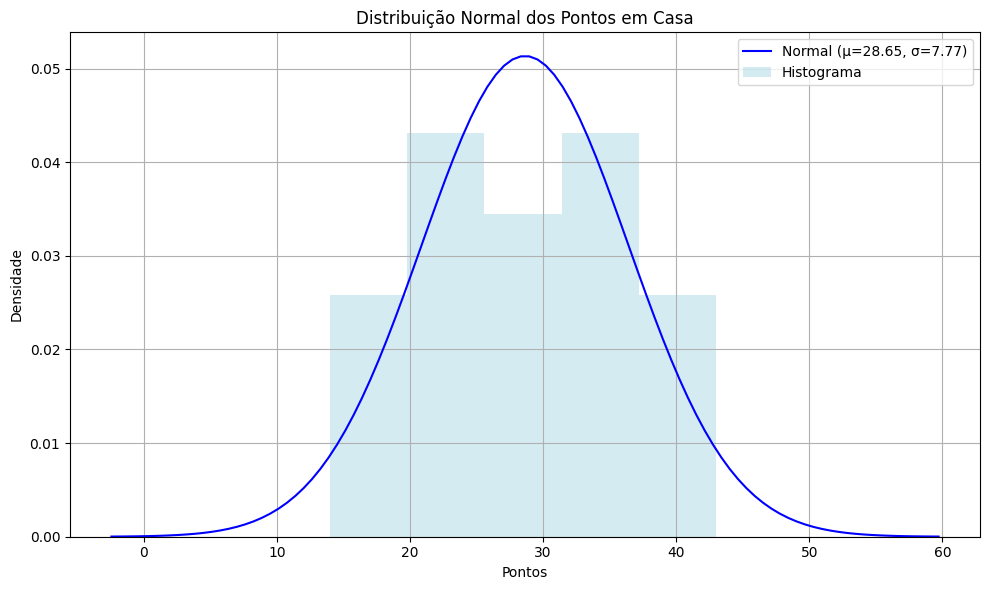

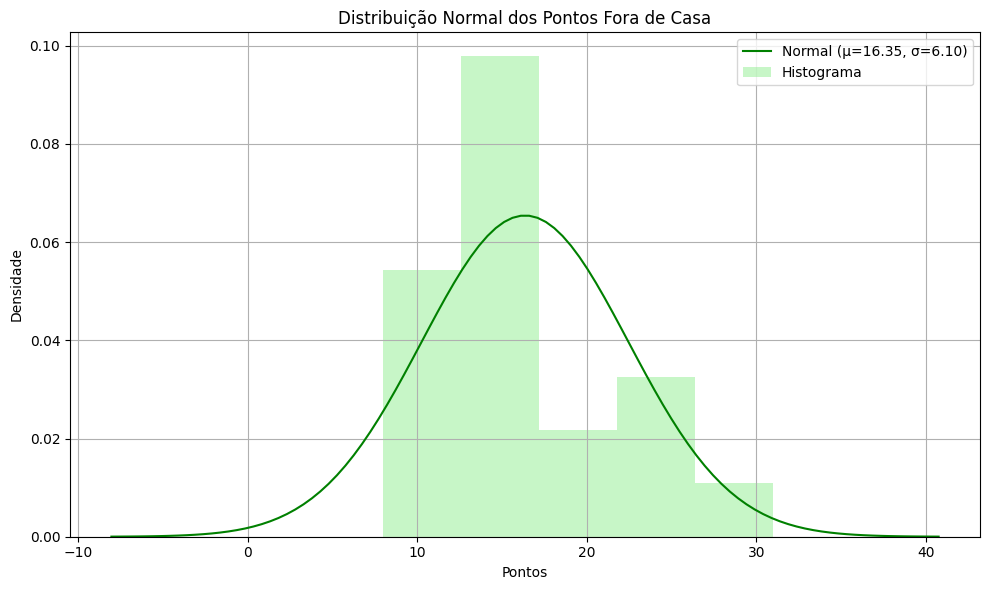

In [34]:
from scipy.stats import norm
import numpy as np
# Calcular média e desvio padrão
home_mean = home_points['Pontos'].mean()
home_std = home_points['Pontos'].std()
away_mean = away_points['Pontos'].mean()
away_std = away_points['Pontos'].std()

x_home = np.linspace(home_mean - 4*home_std, home_mean + 4*home_std, 100)
x_away = np.linspace(away_mean - 4*away_std, away_mean + 4*away_std, 100)

home_pdf = norm.pdf(x_home, home_mean, home_std)
away_pdf = norm.pdf(x_away, away_mean, away_std)

plt.figure(figsize=(10, 6))
plt.plot(x_home, home_pdf, label=f'Normal (μ={home_mean:.2f}, σ={home_std:.2f})', color='blue')
plt.hist(home_points['Pontos'], bins=5, density=True, alpha=0.5, color='lightblue', label='Histograma')
plt.title('Distribuição Normal dos Pontos em Casa')
plt.xlabel('Pontos')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x_away, away_pdf, label=f'Normal (μ={away_mean:.2f}, σ={away_std:.2f})', color='green')
plt.hist(away_points['Pontos'], bins=5, density=True, alpha=0.5, color='lightgreen', label='Histograma')
plt.title('Distribuição Normal dos Pontos Fora de Casa')
plt.xlabel('Pontos')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Here we observe the final championship table, which, when compared
#### with the official end-of-championship table, showed some changes. The champion
#### was indeed Botafogo, and second place was Palmeiras. However, with a larger
#### point difference, and in third place was Flamengo. link: https://www.google.com/search?q=tabela+final+brasileiro+2024&rlz=1C5CHFA_enBR1063BR1063&oq=tabela+final+brasi&gs_lcrp=EgZjaHJvbWUqBwgBEAAYgAQyBggAEEUYOTIHCAEQABiABDIHCAIQABiABDIHCAMQABiABDIHCAQQABiABDIHCAUQABiABDIHCAYQABiABDIHCAcQABiABDIHCAgQABiABDIHCAkQABiABNIBCDMyODdqMGo3qAIAsAIA&sourceid=chrome&ie=UTF-8#sie=lg;/g/11vb7cvd3q;2;/m/0fnk7q;st;fp;1;;;

In [37]:
home_points = df[['Em casa', 'Em casa pontos']].rename(columns={'Em casa': 'Time', 'Em casa pontos': 'Pontos'})
away_points = df[['Visitante', 'Visitante pontos']].rename(columns={'Visitante': 'Time', 'Visitante pontos': 'Pontos'})

total_points = pd.concat([home_points, away_points]).groupby('Time')['Pontos'].sum().reset_index()

total_points = total_points.sort_values(by='Pontos', ascending=False)

# Show result table
print(total_points)

                   Time  Pontos
4         Botafogo (RJ)      68
15            Palmeiras      64
11            Fortaleza      63
13        Internacional      59
9              Flamengo      58
17            São Paulo      57
7              Cruzeiro      47
3                 Bahia      46
18        Vasco da Gama      43
2      Atlético Mineiro      41
5           Corinthians      41
12               Grêmio      39
19              Vitória      38
14            Juventude      37
10           Fluminense      37
6              Criciúma      37
16  Red Bull Bragantino      36
0        Ath Paranaense      34
8                Cuiabá      29
1        Atl Goianiense      26


#### We can identify through this EDA that in the 2024 championship, the deciding factor for the winner was the away game results. Fortaleza achieved the highest number of points at home but ranked fourth in points earned away from home, similar to Palmeiras, which was consistent at home but fell behind Botafogo in away games. Botafogo, which ranked fourth at home, was first in away games. We observe that the low average points scored away from home helped Botafogo, which obtained a point total above the average. It is worth noting that the provided data is not complete, as upon verifying the final championship table, we noticed some changes in the final point totals.